# Data Science Billionaires

import libraries :

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read data and show head of the data:

In [125]:
data = pd.read_csv("Billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


The analysis of the existence or non-existence of empty cells:

In [126]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

Delete empty cells:

In [127]:
data=data.dropna()

In [128]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Calculating the average age and variance of billionaires:

In [129]:
avg_age = data["Age"].mean()
print(f"AVG of Billionaires' age is: {avg_age}")

variance = data["Age"].var()
print(f"variance of Billionaires' age is: {variance}")

AVG of Billionaires' age is: 63.1136023916293
variance of Billionaires' age is: 180.7721364011008


I calculated the total wealth of each country and displayed it on a chart:

In [130]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")

data["NetWorth"] = data["NetWorth"].astype(float)

In [131]:
df = data.groupby(["Country"])["NetWorth"].sum().reset_index()
df = df.sort_values(by=["NetWorth"],ascending=False)
df.head()

,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3


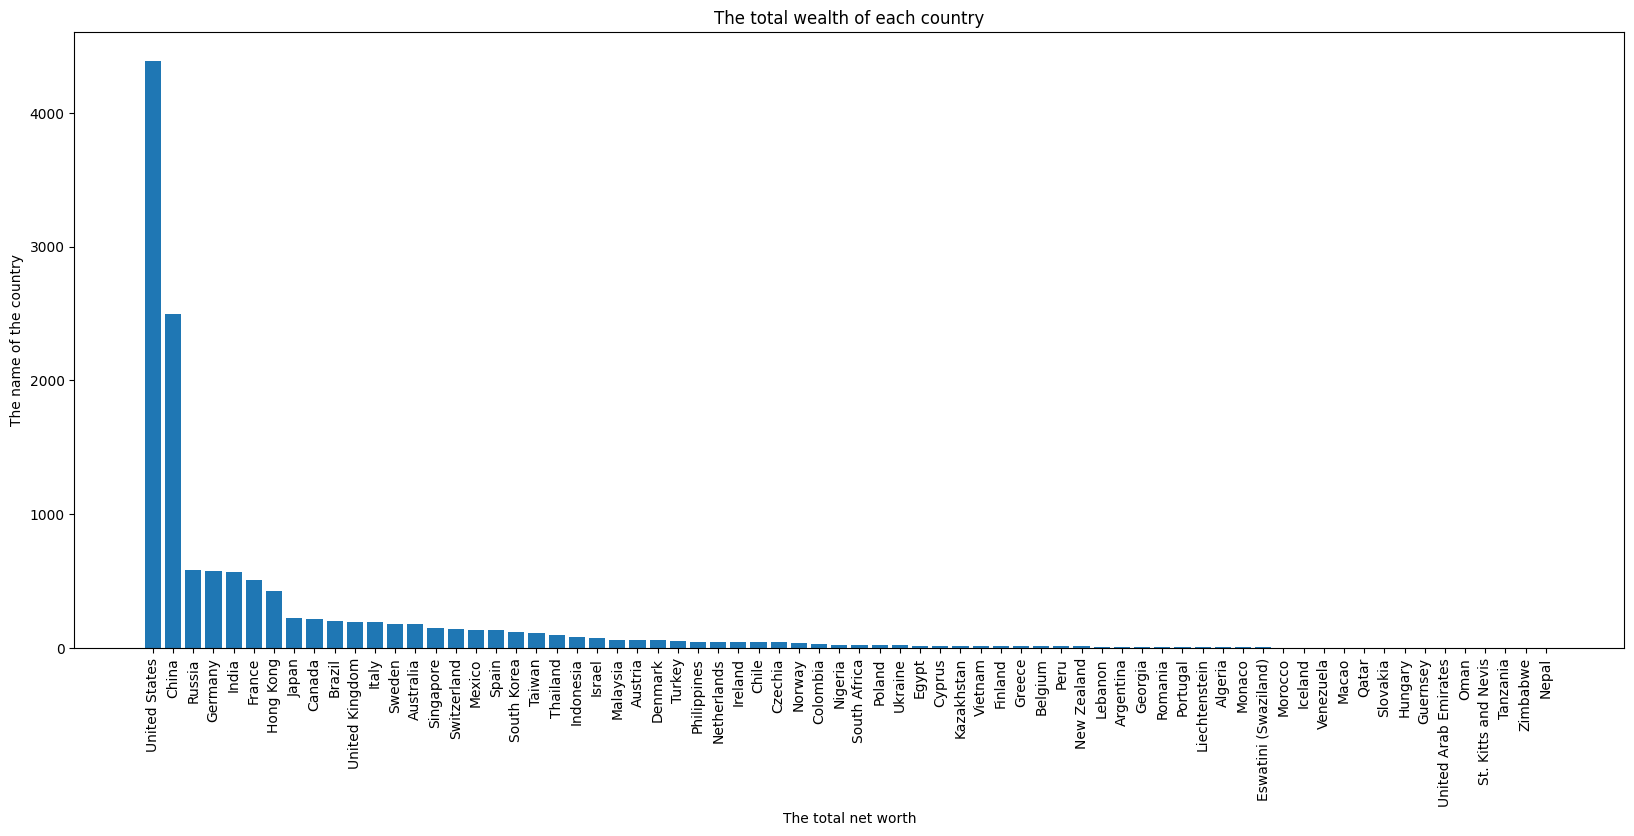

In [132]:
plt.figure(figsize=(20,8))
plt.bar(df["Country"],df["NetWorth"])
plt.title("The total wealth of each country")
plt.xticks(rotation=90)
plt.xlabel("The total net worth")
plt.ylabel("The name of the country")
plt.show()

Show the top ten richest Americans :

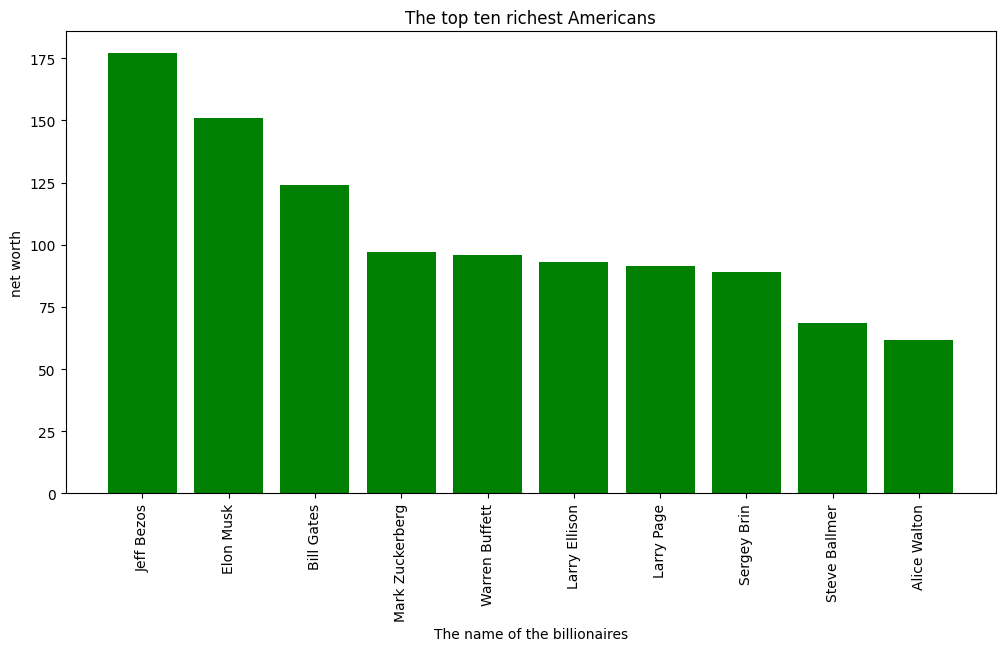

In [133]:
df = data.query("Country == 'United States';").head(10)

plt.figure(figsize=(12,6))
plt.bar(df["Name"],df["NetWorth"],color="green")
plt.title("The top ten richest Americans")
plt.xticks(rotation=90)
plt.ylabel("net worth")
plt.xlabel("The name of the billionaires")
plt.show()

The ten countries with the fewest number of billionaires in the world, along with their total wealth:

In [134]:
df = data.groupby(["Country"]).agg(count=("NetWorth", "count"),total_net_worth=("NetWorth", "sum")).reset_index()
df = df.sort_values(by=["count"],ascending=True).head(12)
df

,Country,count,total_net_worth
0,Algeria,1,4.8
67,Venezuela,1,3.2
64,United Arab Emirates,1,2.4
60,Tanzania,1,1.6
56,St. Kitts and Nevis,1,1.6
43,Oman,1,2.3
38,Nepal,1,1.4
33,Macao,1,3.1
32,Liechtenstein,1,5.5
20,Guernsey,1,2.6


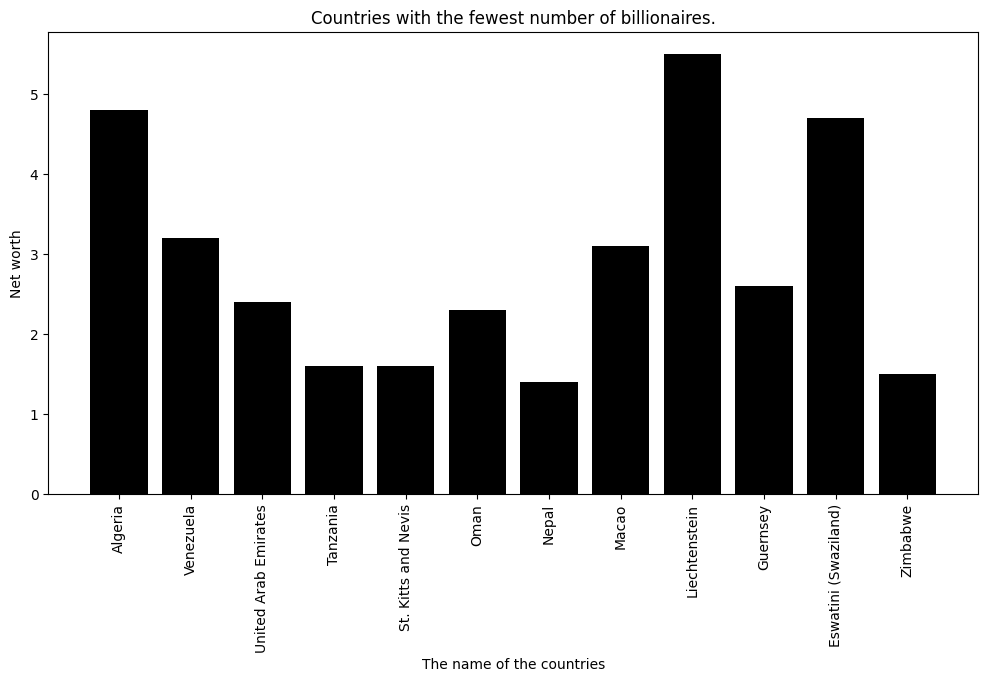

In [135]:
plt.figure(figsize=(12,6))
plt.bar(df["Country"],df["total_net_worth"],color="black")
plt.title("Countries with the fewest number of billionaires.")
plt.xticks(rotation=90)
plt.ylabel("Net worth")
plt.xlabel("The name of the countries")
plt.show()